## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Import dataset

In [2]:
df = pd.read_csv('Data_Negara_HELP.csv')
df.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## Data Preparation

In [3]:
# Find information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
# Display summary of statistical data
df.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [5]:
# Check missing values
df.isnull().sum()

Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

In [6]:
# Check duplicate data
df.duplicated().any()

False

Multivariate analysis

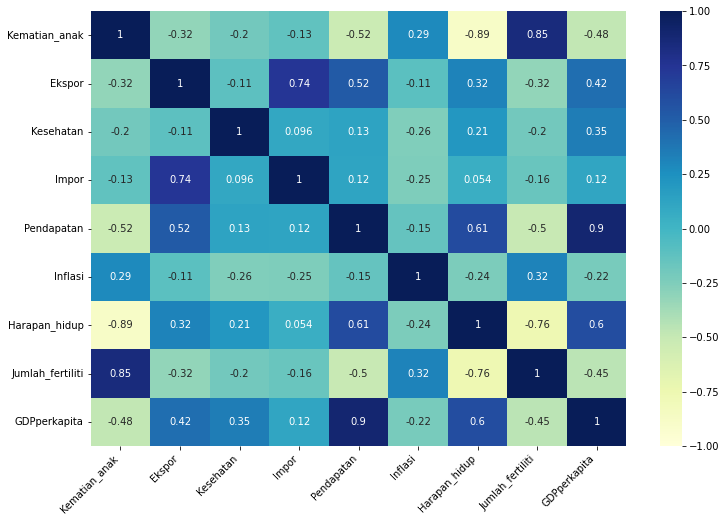

In [7]:
fig, ax = plt.subplots(figsize=(12,8))

# Heatmap
ax = sns.heatmap(data=df.corr(), vmin=-1, vmax=1, cmap='YlGnBu', annot=True)
ax.set_xticklabels(ax.get_xticklabels(), ha='right', rotation=45)

plt.show()

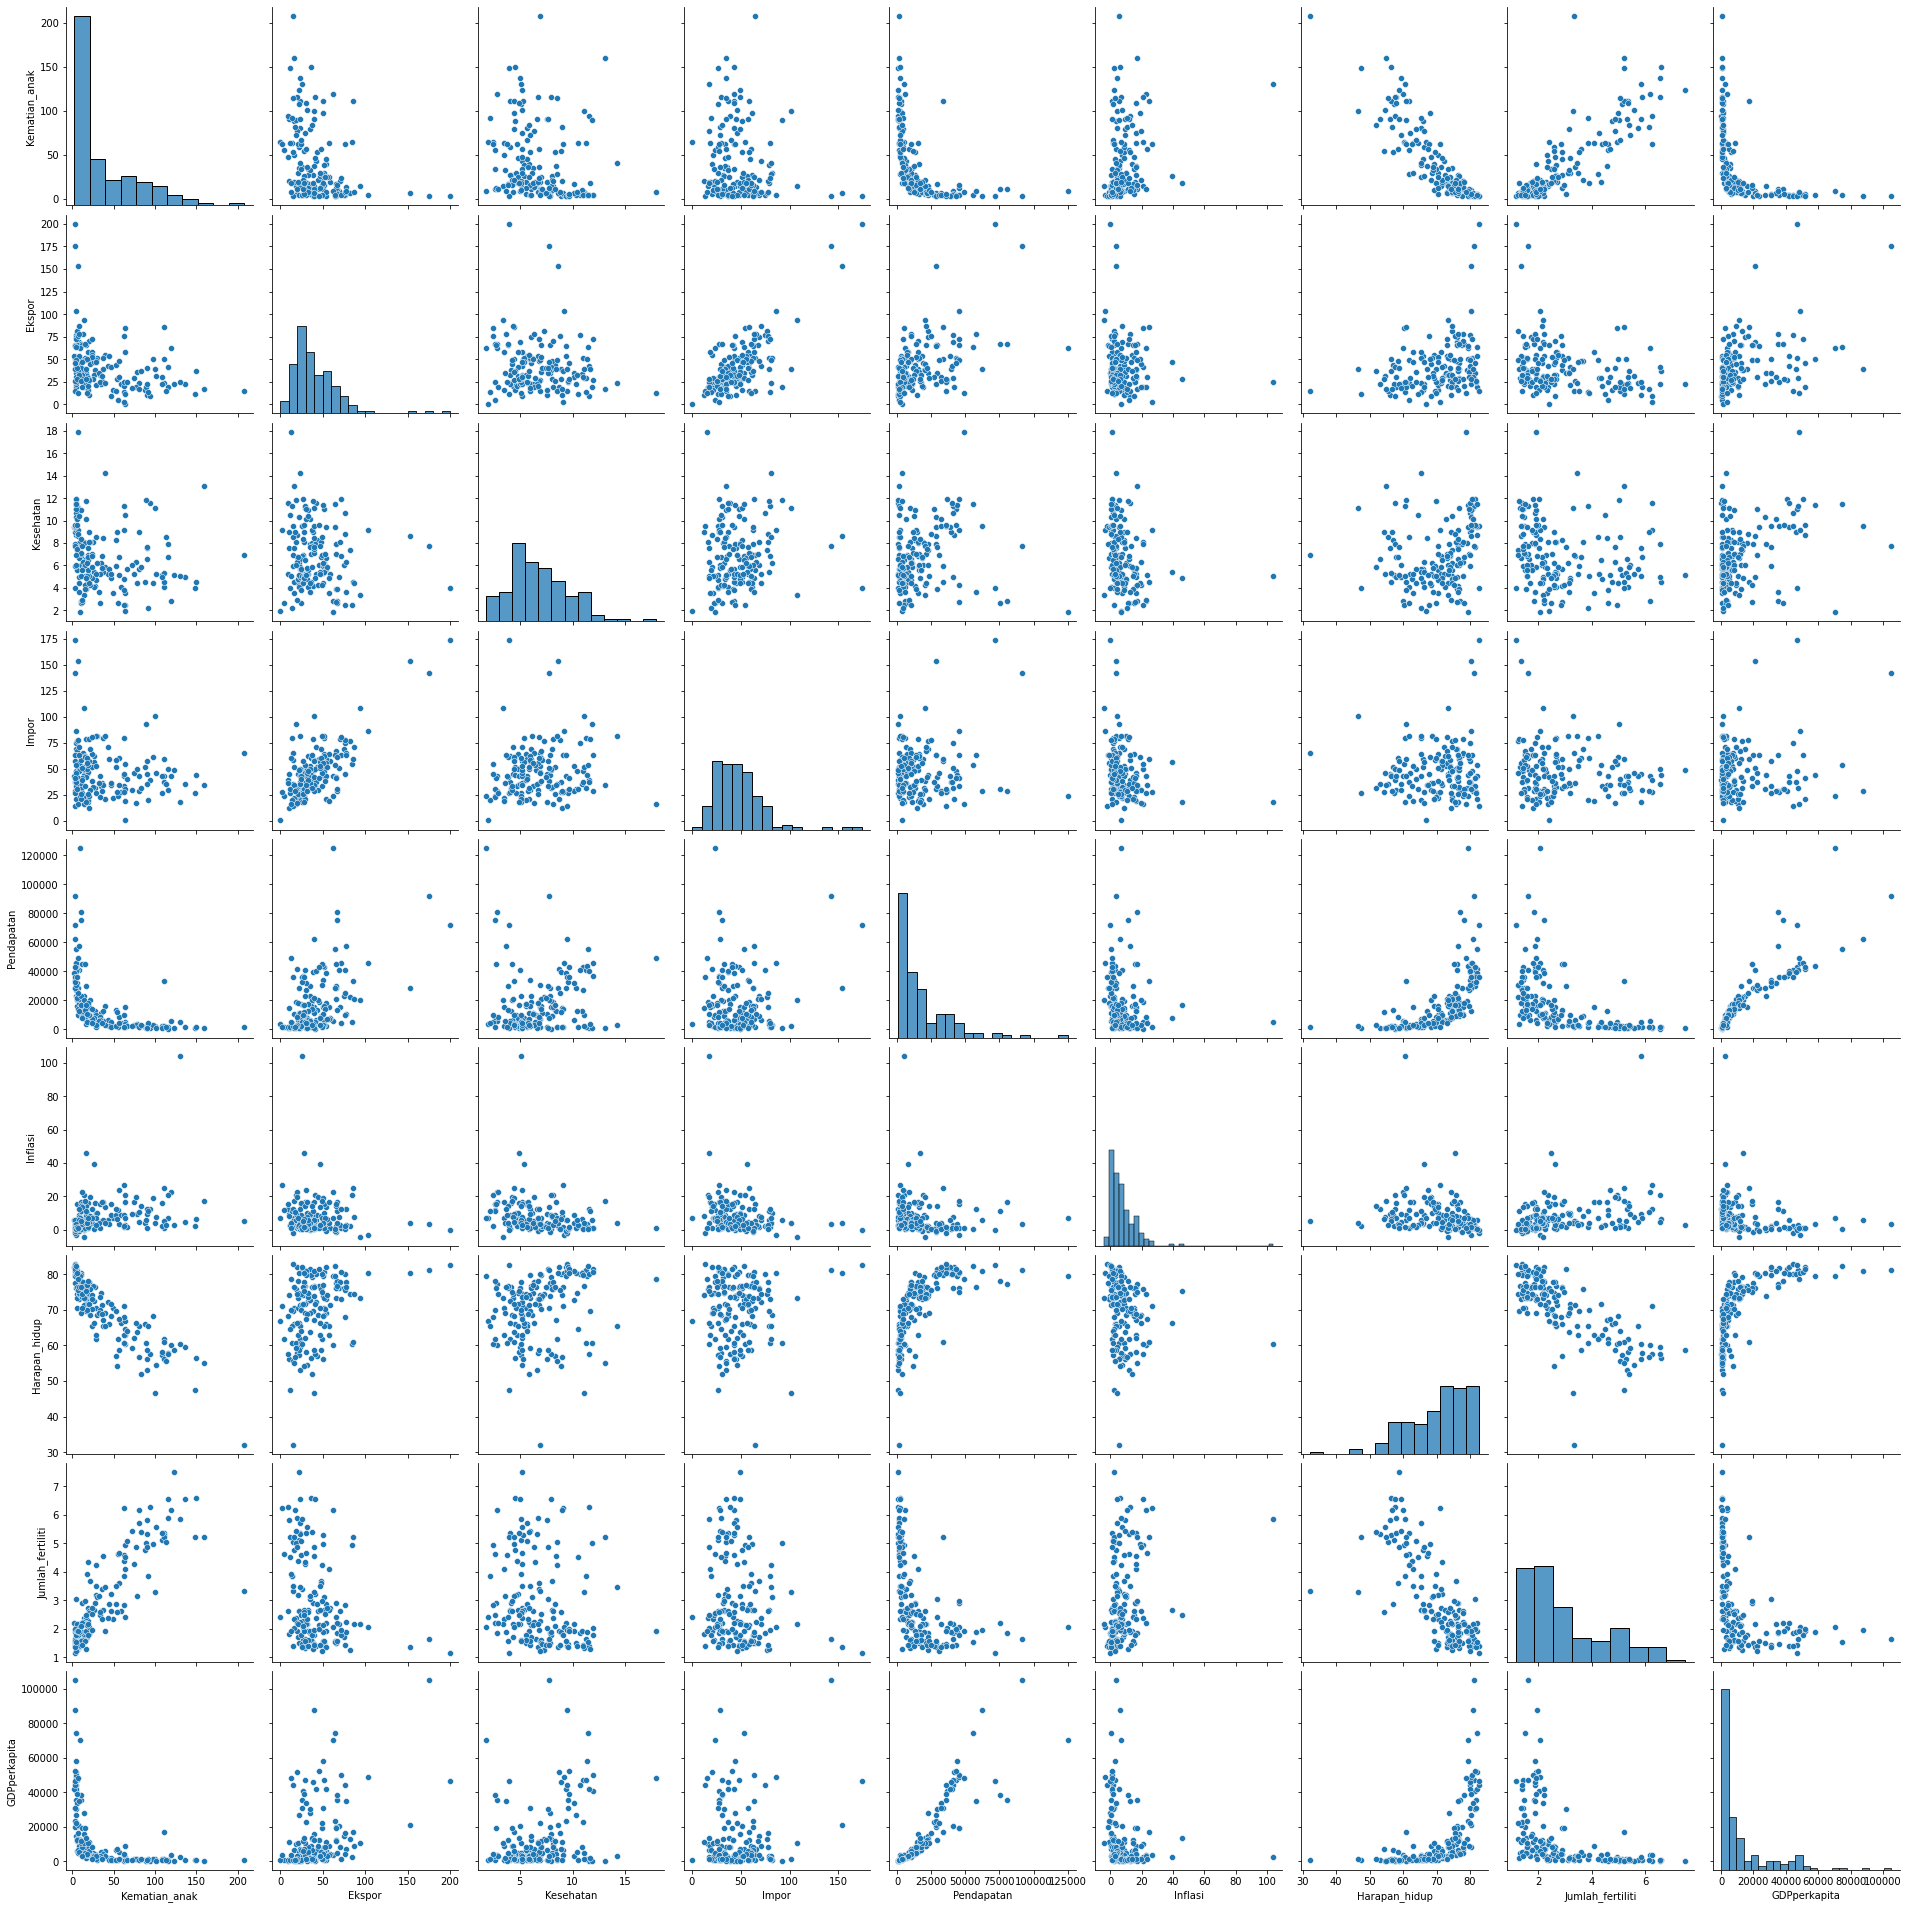

In [8]:
# Pair Scatter
g = sns.pairplot(df, height=3)

Handling outliers each variable

c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


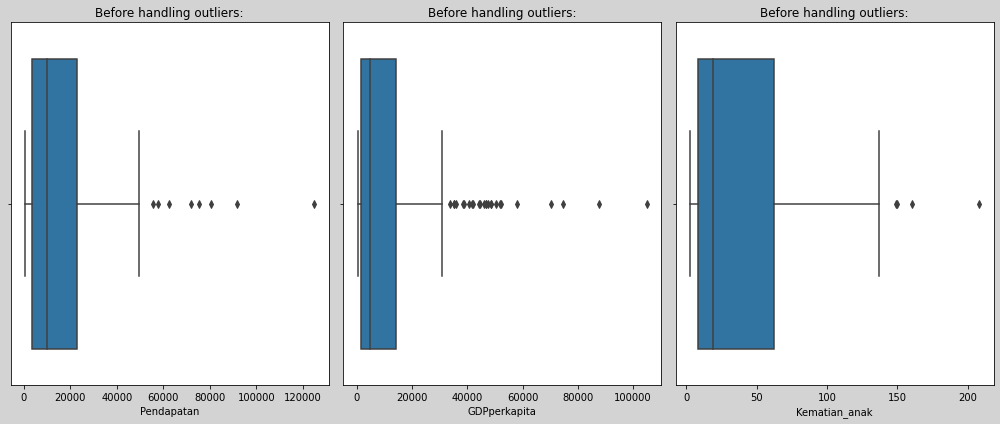

In [9]:
# get specific feature
df2 = df[['Pendapatan', 'GDPperkapita', 'Kematian_anak']]

fig = plt.subplots(figsize=(14, 6), facecolor='lightgrey')

for i, variable in enumerate(df2.columns):
    plt.subplot(1, 3, i+1)
    sns.boxplot(df2[variable])
    plt.tight_layout()
    plt.title('Before handling outliers:')

plt.show()

C:\Users\Agung Prayoga\AppData\Local\Temp\ipykernel_8840\1726284467.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df2[col] = outliers_for_variable(df2, col)
c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or mi

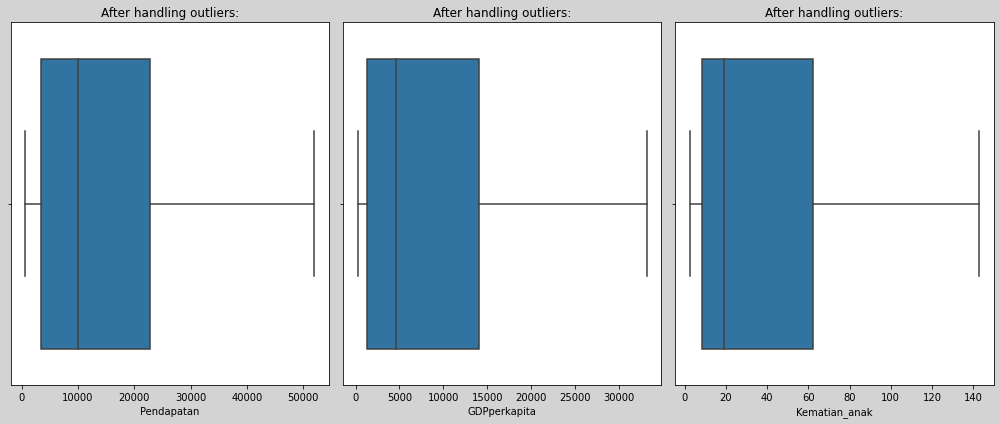

In [10]:
# Re-check missing value
df2.isnull().sum()

new_df2 = df2.iloc[:,:]

# Find outlier
def outliers_for_variable(df2, col):    
    Q1 = df2.loc[:,col].quantile(0.25)
    Q3 = df2.loc[:,col].quantile(0.75)
    upper_limit = Q3 + (1.5*(Q3-Q1))
    lower_limit = Q1 - (1.5*(Q3-Q1))
    return new_df2[col].apply(lambda x : upper_limit if x > upper_limit 
    else lower_limit if x < lower_limit 
    else x)
    
for col in new_df2:
    new_df2[col] = outliers_for_variable(df2, col)

fig = plt.subplots(figsize=(14, 6), facecolor='lightgrey')

for i, variable in enumerate(new_df2.columns):
    plt.subplot(1, 3, i+1)
    sns.boxplot(new_df2[variable])
    plt.tight_layout()
    plt.title('After handling outliers:')

plt.show()

Univariate Analysis

c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

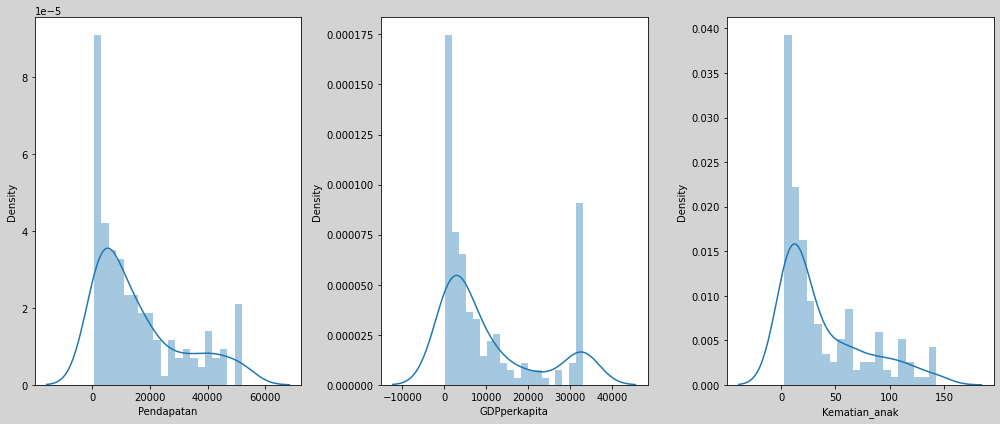

In [11]:
# Histogram + KDE
fig = plt.subplots(figsize=(14, 6), facecolor='lightgrey')

for i, variable in enumerate(new_df2.columns):
    plt.subplot(1, 3, i+1)
    sns.distplot(new_df2[variable], bins=20)
    plt.tight_layout()

plt.show()

Bivariate Analysis

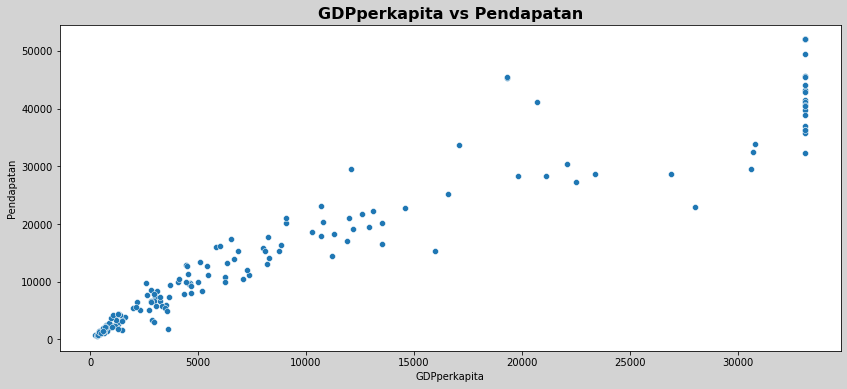

In [12]:
# Scatter plot GDPperkapita vs Pendapatan
fig, ax = plt.subplots(figsize=(14, 6), facecolor='lightgrey')

ax = sns.scatterplot(x='GDPperkapita', y='Pendapatan', data=new_df2)
ax.set_title("GDPperkapita vs Pendapatan", fontsize=16, fontweight='bold')

plt.show()

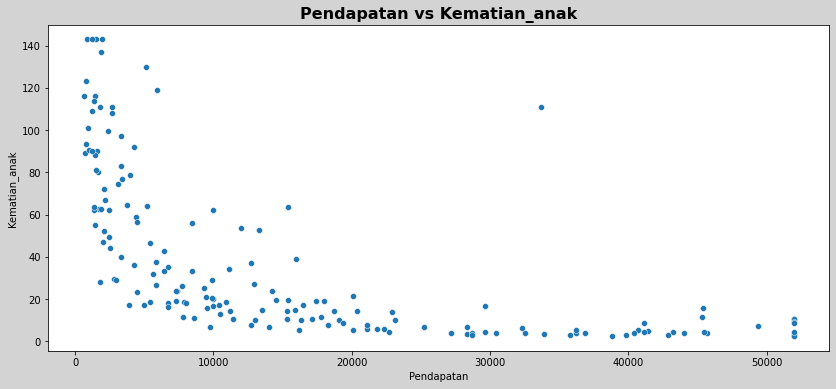

In [13]:
# Scatter plot Pendapatan vs Kematian anak
fig, ax = plt.subplots(figsize=(14, 6), facecolor='lightgrey')

ax = sns.scatterplot(x='Pendapatan', y='Kematian_anak', data=new_df2)
ax.set_title("Pendapatan vs Kematian_anak", fontsize=16, fontweight='bold')

plt.show()

## Clustering

Scale the data

In [14]:
# Feature scale
df_num = df[['Pendapatan', 'GDPperkapita', 'Kematian_anak']]
df_num.head()

,Pendapatan,GDPperkapita,Kematian_anak
0,1610,553,90.2
1,9930,4090,16.6
2,12900,4460,27.3
3,5900,3530,119.0
4,19100,12200,10.3


In [15]:
# Fit transform
sc = StandardScaler()

df_scaled = sc.fit_transform(df_num)

# Convert to dataframe
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = df_num.columns
df_scaled.head()

,Pendapatan,GDPperkapita,Kematian_anak
0,-0.808245,-0.679180,1.291532
1,-0.375369,-0.485623,-0.538949
2,-0.220844,-0.465376,-0.272833
3,-0.585043,-0.516268,2.007808
4,0.101732,-0.041817,-0.695634


Elbow curve

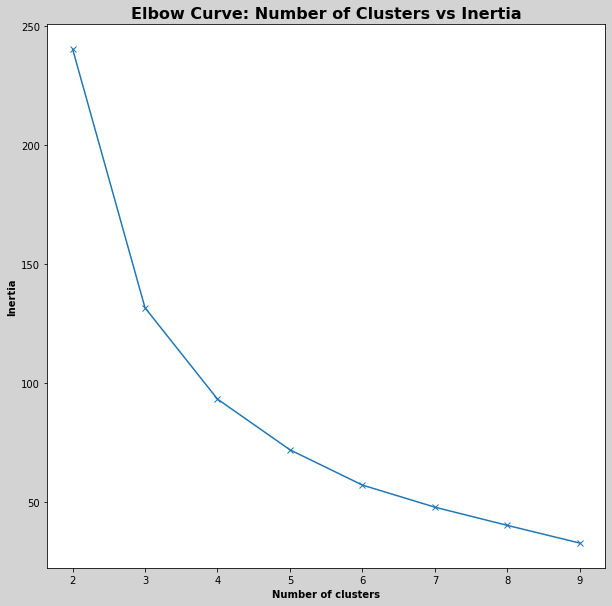

In [16]:
ssd = []
num_of_clusters = list(range(2, 10))

for i in num_of_clusters:
    k_means = KMeans(n_clusters=i, init='k-means++', random_state=42)
    k_means.fit(df_scaled)
    ssd.append(k_means.inertia_)

fig, ax = plt.subplots(figsize=(10, 10), facecolor='lightgrey')

ax.plot(num_of_clusters, ssd, marker='x')
ax.set_xlabel('Number of clusters', fontsize=10, fontweight='bold')
ax.set_ylabel('Inertia', fontsize=10, fontweight='bold')
ax.set_title('Elbow Curve: Number of Clusters vs Inertia', fontsize=16, fontweight='bold')

plt.show()


Silhouette score method

For n_clusters=2, the silhouette score is 0.5597788232000319
For n_clusters=3, the silhouette score is 0.5306239085564016
For n_clusters=4, the silhouette score is 0.5335726133901341
For n_clusters=5, the silhouette score is 0.49252640953379373
For n_clusters=6, the silhouette score is 0.4523837564902024
For n_clusters=7, the silhouette score is 0.4248131491796254
For n_clusters=8, the silhouette score is 0.45306361198275
For n_clusters=9, the silhouette score is 0.4605688406510154


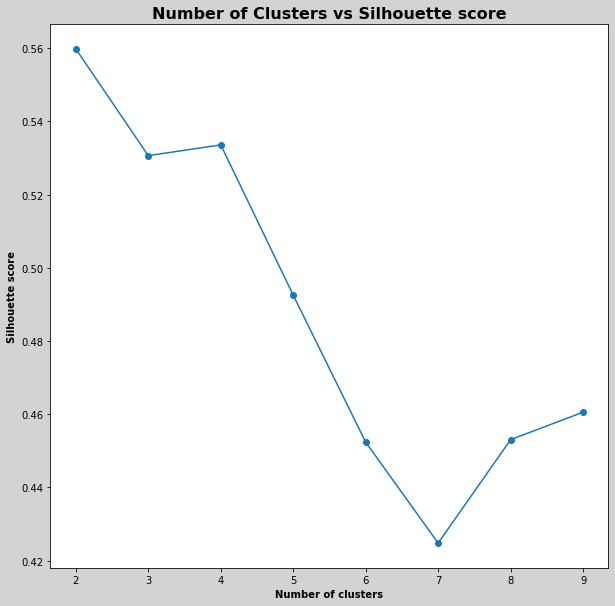

In [17]:
sil = []

for i in num_of_clusters:
    k_means = KMeans(n_clusters=i, random_state=42)
    k_means.fit(df_scaled)
    cluster_label = k_means.labels_
    sil.append(silhouette_score(df_scaled, cluster_label))
    sil_avg = silhouette_score(df_scaled, cluster_label)
    print("For n_clusters={0}, the silhouette score is {1}".format(i, sil_avg))


fig, ax = plt.subplots(figsize=(10, 10), facecolor='lightgrey')

ax.plot(num_of_clusters, sil, marker='o')
ax.set_xlabel('Number of clusters', fontsize=10, fontweight='bold')
ax.set_ylabel('Silhouette score', fontsize=10, fontweight='bold')
ax.set_title('Number of Clusters vs Silhouette score', fontsize=16, fontweight='bold')

plt.show()

K-Means Cluster (k = 2) GDPperkapita vs Pendapatan

[0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1
 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0]


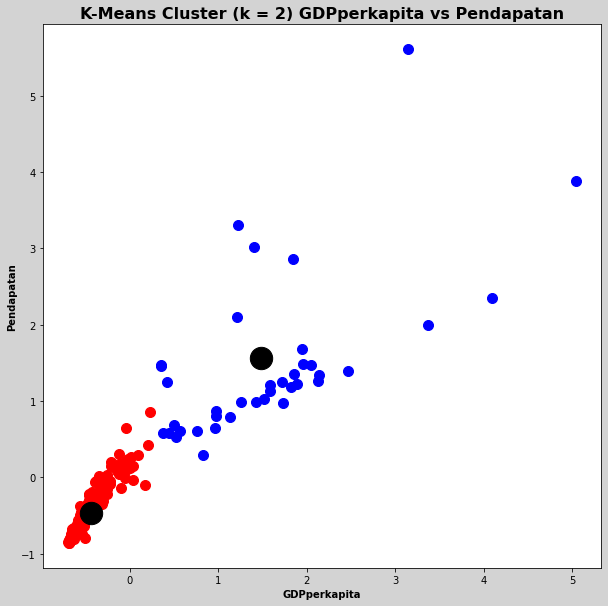

In [18]:
k_means = KMeans(n_clusters=2, init='k-means++', random_state=42).fit(df_scaled)

df_kmeans = pd.DataFrame(data=df_scaled, columns=['GDPperkapita', 'Pendapatan'])
df_kmeans['label_k_means'] = k_means.labels_

print(k_means.labels_)
x_0 = df_kmeans.GDPperkapita[df_kmeans.label_k_means == 0]
y_0 = df_kmeans['Pendapatan'][df_kmeans.label_k_means == 0]
x_1 = df_kmeans.GDPperkapita[df_kmeans.label_k_means == 1]
y_1 = df_kmeans['Pendapatan'][df_kmeans.label_k_means == 1]


fig, ax = plt.subplots(figsize=(10, 10), facecolor='lightgrey')

ax.scatter(x_0, y_0, c='red', s=100, linestyle='-')
ax.scatter(x_1, y_1, c='blue', s=100, linestyle='-')
ax.set_xlabel('GDPperkapita', fontsize=10, fontweight='bold')
ax.set_ylabel('Pendapatan', fontsize=10, fontweight='bold')
ax.set_title('K-Means Cluster (k = 2) GDPperkapita vs Pendapatan', fontsize=16, fontweight='bold')

# add centroid
centers = k_means.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=500)

plt.show()

K-Means Cluster (k = 3) GDPperkapita vs Pendapatan

[2 0 0 2 0 0 0 1 1 0 0 1 0 0 0 1 0 2 0 0 0 0 0 1 0 2 2 0 2 1 0 2 2 0 0 0 2
 2 2 0 2 0 1 0 1 0 0 0 0 2 2 0 0 1 1 0 2 0 1 2 0 0 0 2 2 0 2 0 1 2 0 0 0 1
 1 1 0 1 0 0 2 2 1 0 2 0 0 2 2 0 0 1 0 2 2 0 0 2 0 2 0 0 0 0 0 0 2 2 0 0 1
 1 2 2 1 1 2 0 0 0 0 0 0 1 0 0 2 0 1 2 0 0 2 1 0 0 0 0 0 1 0 0 2 0 1 1 0 2
 0 2 2 0 0 0 2 2 0 1 1 1 0 0 0 0 0 2 2]


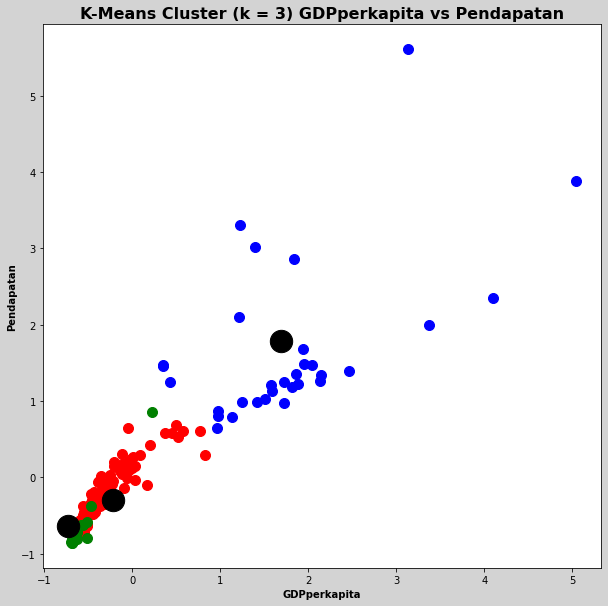

In [19]:
k_means = KMeans(n_clusters=3, init='k-means++', random_state=42).fit(df_scaled)

df_kmeans = pd.DataFrame(data=df_scaled, columns=['GDPperkapita', 'Pendapatan'])
df_kmeans['label_k_means'] = k_means.labels_

print(k_means.labels_)
x_0 = df_kmeans.GDPperkapita[df_kmeans.label_k_means == 0]
y_0 = df_kmeans['Pendapatan'][df_kmeans.label_k_means == 0]
x_1 = df_kmeans.GDPperkapita[df_kmeans.label_k_means == 1]
y_1 = df_kmeans['Pendapatan'][df_kmeans.label_k_means == 1]
x_2 = df_kmeans.GDPperkapita[df_kmeans.label_k_means == 2]
y_2 = df_kmeans['Pendapatan'][df_kmeans.label_k_means == 2]

fig, ax = plt.subplots(figsize=(10, 10), facecolor='lightgrey')

ax.scatter(x_0, y_0, c='red', s=100, linestyle='-')
ax.scatter(x_1, y_1, c='blue', s=100, linestyle='-')
ax.scatter(x_2, y_2, c='green', s=100, linestyle='-')
ax.set_xlabel('GDPperkapita', fontsize=10, fontweight='bold')
ax.set_ylabel('Pendapatan', fontsize=10, fontweight='bold')
ax.set_title('K-Means Cluster (k = 3) GDPperkapita vs Pendapatan', fontsize=16, fontweight='bold')

# add centroid
centers = k_means.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=500)

plt.show()

K-Means Cluster (k = 4) GDPperkapita vs Pendapatan

[0 1 1 0 1 1 1 3 3 1 3 3 1 1 1 3 1 0 1 1 1 1 1 2 1 0 0 1 0 3 1 0 0 1 1 1 0
 0 0 1 0 1 3 3 3 1 1 1 1 0 1 1 1 3 3 1 0 1 3 0 3 1 1 0 0 1 0 1 3 1 1 1 1 3
 3 3 1 3 1 1 0 0 2 1 0 1 1 0 0 1 1 2 1 0 0 1 1 0 3 0 1 1 1 1 1 1 0 0 1 1 3
 3 0 0 2 3 0 1 1 1 1 1 3 2 1 1 0 1 3 0 1 1 0 2 1 3 1 1 3 3 1 1 0 1 3 2 1 0
 1 0 0 1 1 1 1 0 1 3 3 3 1 1 1 1 1 1 0]


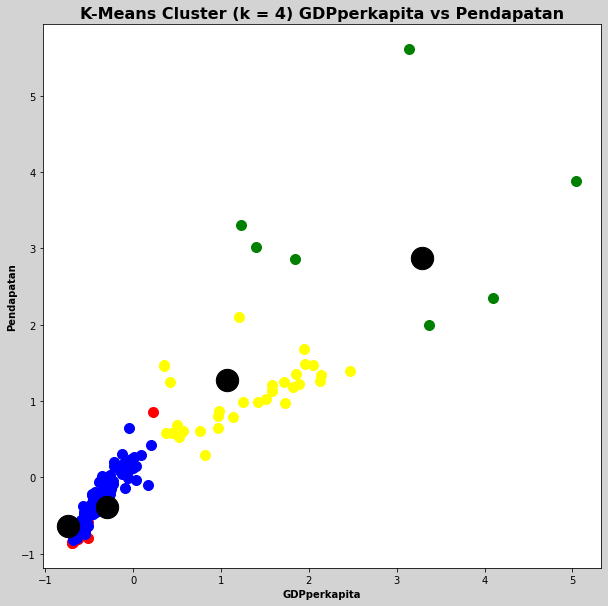

In [20]:
k_means = KMeans(n_clusters=4, init='k-means++', random_state=42).fit(df_scaled)

df_kmeans = pd.DataFrame(data=df_scaled, columns=['GDPperkapita', 'Pendapatan'])
df_kmeans['label_k_means'] = k_means.labels_

print(k_means.labels_)
x_0 = df_kmeans.GDPperkapita[df_kmeans.label_k_means == 0]
y_0 = df_kmeans['Pendapatan'][df_kmeans.label_k_means == 0]
x_1 = df_kmeans.GDPperkapita[df_kmeans.label_k_means == 1]
y_1 = df_kmeans['Pendapatan'][df_kmeans.label_k_means == 1]
x_2 = df_kmeans.GDPperkapita[df_kmeans.label_k_means == 2]
y_2 = df_kmeans['Pendapatan'][df_kmeans.label_k_means == 2]
x_3 = df_kmeans.GDPperkapita[df_kmeans.label_k_means == 3]
y_3 = df_kmeans['Pendapatan'][df_kmeans.label_k_means == 3]

fig, ax = plt.subplots(figsize=(10, 10), facecolor='lightgrey')

ax.scatter(x_0, y_0, c='red', s=100, linestyle='-')
ax.scatter(x_1, y_1, c='blue', s=100, linestyle='-')
ax.scatter(x_2, y_2, c='green', s=100, linestyle='-')
ax.scatter(x_3, y_3, c='yellow', s=100, linestyle='-')
ax.set_xlabel('GDPperkapita', fontsize=10, fontweight='bold')
ax.set_ylabel('Pendapatan', fontsize=10, fontweight='bold')
ax.set_title('K-Means Cluster (k = 4) GDPperkapita vs Pendapatan', fontsize=16, fontweight='bold')

# add centroid
centers = k_means.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=500)

plt.show()

K-Means Cluster (k = 2) Pendapatan vs Kematian_anak

[0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1
 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0]


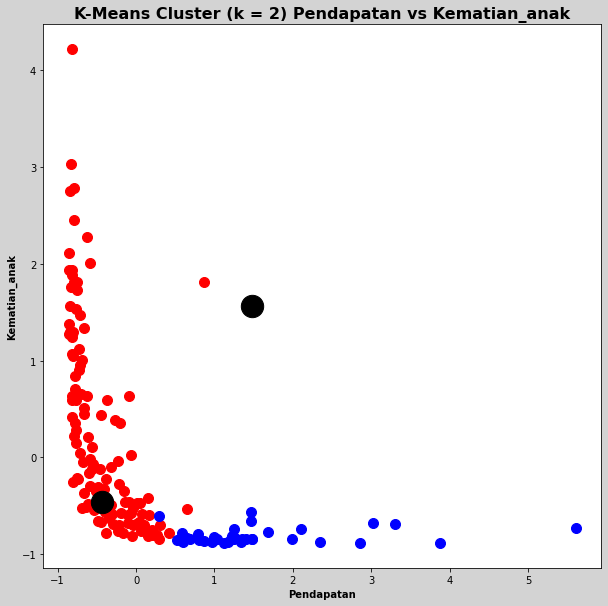

In [21]:
k_means_2 = KMeans(n_clusters=2, init='k-means++', random_state=42).fit(df_scaled)

df_kmeans_2 = pd.DataFrame(data=df_scaled, columns=['Pendapatan', 'Kematian_anak'])
df_kmeans_2['label_k_means_2'] = k_means_2.labels_

print(k_means_2.labels_)

x_0 = df_kmeans_2.Pendapatan[df_kmeans_2.label_k_means_2 == 0]
y_0 = df_kmeans_2['Kematian_anak'][df_kmeans_2.label_k_means_2 == 0]
x_1 = df_kmeans_2.Pendapatan[df_kmeans_2.label_k_means_2 == 1]
y_1 = df_kmeans_2['Kematian_anak'][df_kmeans_2.label_k_means_2 == 1]

fig, ax = plt.subplots(figsize=(10, 10), facecolor='lightgrey')

ax.scatter(x_0, y_0, c='red', s=100, linestyle='-')
ax.scatter(x_1, y_1, c='blue', s=100, linestyle='-')
ax.set_xlabel('Pendapatan', fontsize=10, fontweight='bold')
ax.set_ylabel('Kematian_anak', fontsize=10, fontweight='bold')
ax.set_title('K-Means Cluster (k = 2) Pendapatan vs Kematian_anak', fontsize=16, fontweight='bold')

# add centroid
centers = k_means_2.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=500)

plt.show()

K-Means Cluster (k = 3) Pendapatan vs Kematian_anak

[2 0 0 2 0 0 0 1 1 0 0 1 0 0 0 1 0 2 0 0 0 0 0 1 0 2 2 0 2 1 0 2 2 0 0 0 2
 2 2 0 2 0 1 0 1 0 0 0 0 2 2 0 0 1 1 0 2 0 1 2 0 0 0 2 2 0 2 0 1 2 0 0 0 1
 1 1 0 1 0 0 2 2 1 0 2 0 0 2 2 0 0 1 0 2 2 0 0 2 0 2 0 0 0 0 0 0 2 2 0 0 1
 1 2 2 1 1 2 0 0 0 0 0 0 1 0 0 2 0 1 2 0 0 2 1 0 0 0 0 0 1 0 0 2 0 1 1 0 2
 0 2 2 0 0 0 2 2 0 1 1 1 0 0 0 0 0 2 2]


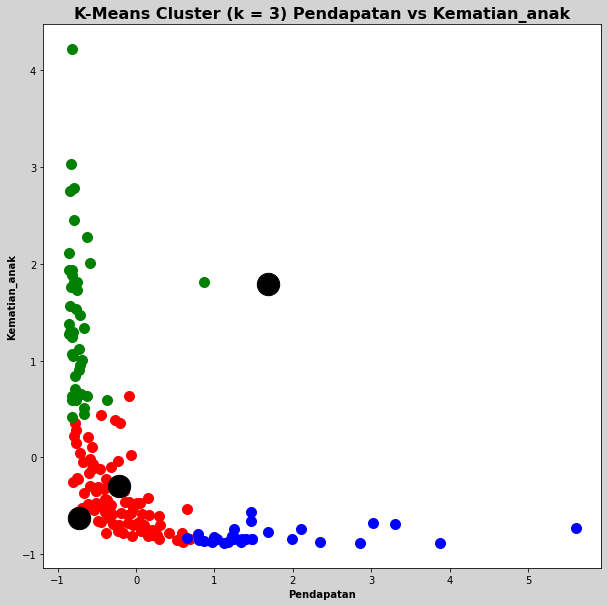

In [22]:
k_means_2 = KMeans(n_clusters=3, init='k-means++', random_state=42).fit(df_scaled)

df_kmeans_2 = pd.DataFrame(data=df_scaled, columns=['Pendapatan', 'Kematian_anak'])
df_kmeans_2['label_k_means_2'] = k_means_2.labels_

print(k_means_2.labels_)

x_0 = df_kmeans_2.Pendapatan[df_kmeans_2.label_k_means_2 == 0]
y_0 = df_kmeans_2['Kematian_anak'][df_kmeans_2.label_k_means_2 == 0]
x_1 = df_kmeans_2.Pendapatan[df_kmeans_2.label_k_means_2 == 1]
y_1 = df_kmeans_2['Kematian_anak'][df_kmeans_2.label_k_means_2 == 1]
x_2 = df_kmeans_2.Pendapatan[df_kmeans_2.label_k_means_2 == 2]
y_2 = df_kmeans_2['Kematian_anak'][df_kmeans_2.label_k_means_2 == 2]

fig, ax = plt.subplots(figsize=(10, 10), facecolor='lightgrey')

ax.scatter(x_0, y_0, c='red', s=100, linestyle='-')
ax.scatter(x_1, y_1, c='blue', s=100, linestyle='-')
ax.scatter(x_2, y_2, c='green', s=100, linestyle='-')
ax.set_xlabel('Pendapatan', fontsize=10, fontweight='bold')
ax.set_ylabel('Kematian_anak', fontsize=10, fontweight='bold')
ax.set_title('K-Means Cluster (k = 3) Pendapatan vs Kematian_anak', fontsize=16, fontweight='bold')

# add centroid
centers = k_means_2.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=500)

plt.show()

K-Means Cluster (k = 4) Pendapatan vs Kematian_anak

[0 1 1 0 1 1 1 3 3 1 3 3 1 1 1 3 1 0 1 1 1 1 1 2 1 0 0 1 0 3 1 0 0 1 1 1 0
 0 0 1 0 1 3 3 3 1 1 1 1 0 1 1 1 3 3 1 0 1 3 0 3 1 1 0 0 1 0 1 3 1 1 1 1 3
 3 3 1 3 1 1 0 0 2 1 0 1 1 0 0 1 1 2 1 0 0 1 1 0 3 0 1 1 1 1 1 1 0 0 1 1 3
 3 0 0 2 3 0 1 1 1 1 1 3 2 1 1 0 1 3 0 1 1 0 2 1 3 1 1 3 3 1 1 0 1 3 2 1 0
 1 0 0 1 1 1 1 0 1 3 3 3 1 1 1 1 1 1 0]


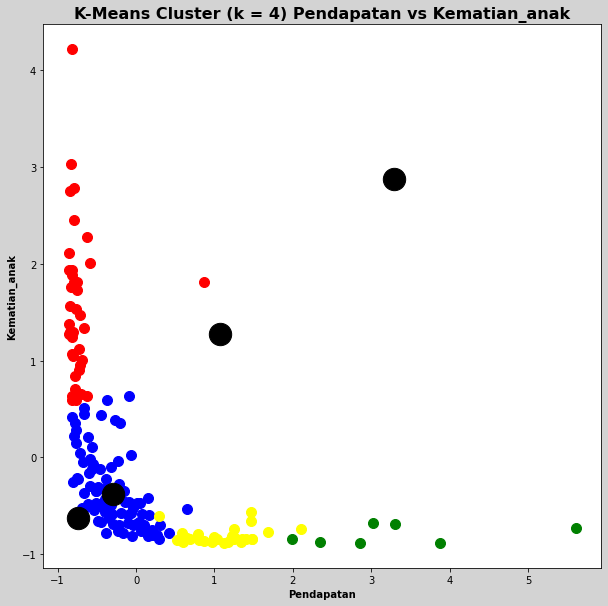

In [23]:
k_means_2 = KMeans(n_clusters=4, init='k-means++', random_state=42).fit(df_scaled)

df_kmeans_2 = pd.DataFrame(data=df_scaled, columns=['Pendapatan', 'Kematian_anak'])
df_kmeans_2['label_k_means_2'] = k_means_2.labels_

print(k_means_2.labels_)

x_0 = df_kmeans_2.Pendapatan[df_kmeans_2.label_k_means_2 == 0]
y_0 = df_kmeans_2['Kematian_anak'][df_kmeans_2.label_k_means_2 == 0]
x_1 = df_kmeans_2.Pendapatan[df_kmeans_2.label_k_means_2 == 1]
y_1 = df_kmeans_2['Kematian_anak'][df_kmeans_2.label_k_means_2 == 1]
x_2 = df_kmeans_2.Pendapatan[df_kmeans_2.label_k_means_2 == 2]
y_2 = df_kmeans_2['Kematian_anak'][df_kmeans_2.label_k_means_2 == 2]
x_3 = df_kmeans_2.Pendapatan[df_kmeans_2.label_k_means_2 == 3]
y_3 = df_kmeans_2['Kematian_anak'][df_kmeans_2.label_k_means_2 == 3]

fig, ax = plt.subplots(figsize=(10, 10), facecolor='lightgrey')

ax.scatter(x_0, y_0, c='red', s=100, linestyle='-')
ax.scatter(x_1, y_1, c='blue', s=100, linestyle='-')
ax.scatter(x_2, y_2, c='green', s=100, linestyle='-')
ax.scatter(x_3, y_3, c='yellow', s=100, linestyle='-')
ax.set_xlabel('Pendapatan', fontsize=10, fontweight='bold')
ax.set_ylabel('Kematian_anak', fontsize=10, fontweight='bold')
ax.set_title('K-Means Cluster (k = 4) Pendapatan vs Kematian_anak', fontsize=16, fontweight='bold')

# add centroid
centers = k_means_2.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=500)

plt.show()

## Final Analysis

In [41]:
# cluster 0 -> GDPperkapita vs Pendapatan
cluster_k_means=df[df_kmeans['label_k_means'] == 0]
Fund = cluster_k_means.sort_values(
    ['GDPperkapita','Pendapatan'], ascending=[True, True])

Fund.reset_index(drop=True, inplace=True)
Fund['Rank']= Fund.index+1
Fund

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,Rank
0,Burundi,93.6,8.920,11.60,39.2000,764,12.300,57.7,6.26,231,1
1,Liberia,89.3,19.100,11.80,92.6000,700,5.470,60.8,5.02,327,2
2,"Congo, Dem. Rep.",116.0,41.100,7.91,49.6000,609,20.800,57.5,6.54,334,3
3,Niger,123.0,22.200,5.16,49.1000,814,2.550,58.8,7.49,348,4
4,Sierra Leone,160.0,16.800,13.10,34.5000,1220,17.200,55.0,5.20,399,5
5,Madagascar,62.2,25.000,3.77,43.0000,1390,8.790,60.8,4.60,413,6
6,Mozambique,101.0,31.500,5.21,46.2000,918,7.640,54.5,5.56,419,7
7,Central African Republic,149.0,11.800,3.98,26.5000,888,2.010,47.5,5.21,446,8
8,Malawi,90.5,22.800,6.59,34.9000,1030,12.100,53.1,5.31,459,9
9,Togo,90.3,40.200,7.65,57.3000,1210,1.180,58.7,4.87,488,10


In [31]:
# cluster 1 -> GDPperkapita vs Pendapatan 
cluster_k_means=df[df_kmeans['label_k_means'] == 1]
Fund = cluster_k_means.sort_values(
    ['GDPperkapita','Pendapatan'], ascending=[True, True])

Fund.reset_index(drop=True, inplace=True)
Fund['Rank']= Fund.index+1
Fund

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,Rank
0,Eritrea,55.2,4.79,2.66,23.3,1420,11.600,61.7,4.61,482,1
1,Nepal,47.0,9.58,5.25,36.4,1990,15.100,68.3,2.61,592,2
2,Tajikistan,52.4,14.90,5.98,58.6,2110,12.500,69.6,3.51,738,3
3,Bangladesh,49.4,16.00,3.52,21.8,2440,7.140,70.4,2.33,758,4
4,Cambodia,44.4,54.10,5.68,59.5,2520,3.120,66.1,2.88,786,5
...,...,...,...,...,...,...,...,...,...,...,...
83,Venezuela,17.1,28.50,4.91,17.6,16500,45.900,75.4,2.47,13500,84
84,Croatia,5.5,37.60,7.76,38.1,20100,0.821,76.3,1.55,13500,85
85,Estonia,4.5,75.10,6.03,68.7,22700,1.740,76.0,1.72,14600,86
86,Barbados,14.2,39.50,7.97,48.7,15300,0.321,76.7,1.78,16000,87


In [32]:
# cluster 2 -> GDPperkapita vs Pendapatan
cluster_k_means=df[df_kmeans['label_k_means'] == 2]
Fund = cluster_k_means.sort_values(
    ['GDPperkapita','Pendapatan'], ascending=[True, True])

Fund.reset_index(drop=True, inplace=True)
Fund['Rank']= Fund.index+1
Fund

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,Rank
0,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,1
1,Kuwait,10.8,66.7,2.63,30.4,75200,11.200,78.2,2.21,38500,2
2,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,3
3,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300,4
4,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600,5
5,Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87800,6
6,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,7


In [33]:
# cluster 3 -> GDPperkapita vs Pendapatan
cluster_k_means=df[df_kmeans['label_k_means'] == 3]
Fund = cluster_k_means.sort_values(
    ['GDPperkapita','Pendapatan'], ascending=[True, True])

Fund.reset_index(drop=True, inplace=True)
Fund['Rank']= Fund.index+1
Fund

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,Rank
0,Oman,11.7,65.7,2.77,41.2,45300,15.600,76.1,2.90,19300,1
1,Saudi Arabia,15.7,49.6,4.29,33.0,45400,17.200,75.1,2.96,19300,2
2,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800,3
3,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,4
4,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100,5
5,South Korea,4.1,49.4,6.93,46.2,30400,3.160,80.1,1.23,22100,6
6,Portugal,3.9,29.9,11.00,37.4,27200,0.643,79.8,1.39,22500,7
7,Slovenia,3.2,64.3,9.41,62.9,28700,-0.987,79.5,1.57,23400,8
8,Greece,3.9,22.1,10.30,30.7,28700,0.673,80.4,1.48,26900,9
9,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,10


In [35]:
# cluster 0 -> Pendapatan vs Kematian_anak
cluster_k_means=df[df_kmeans_2['label_k_means_2'] == 0]
Fund = cluster_k_means.sort_values(
    ['Pendapatan','Kematian_anak'], ascending=[True, True])

Fund.reset_index(drop=True, inplace=True)
Fund['Rank']= Fund.index+1
Fund

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,Rank
0,"Congo, Dem. Rep.",116.0,41.100,7.91,49.6000,609,20.800,57.5,6.54,334,1
1,Liberia,89.3,19.100,11.80,92.6000,700,5.470,60.8,5.02,327,2
2,Burundi,93.6,8.920,11.60,39.2000,764,12.300,57.7,6.26,231,3
3,Niger,123.0,22.200,5.16,49.1000,814,2.550,58.8,7.49,348,4
4,Central African Republic,149.0,11.800,3.98,26.5000,888,2.010,47.5,5.21,446,5
5,Mozambique,101.0,31.500,5.21,46.2000,918,7.640,54.5,5.56,419,6
6,Malawi,90.5,22.800,6.59,34.9000,1030,12.100,53.1,5.31,459,7
7,Guinea,109.0,30.300,4.93,43.2000,1190,16.100,58.0,5.34,648,8
8,Togo,90.3,40.200,7.65,57.3000,1210,1.180,58.7,4.87,488,9
9,Sierra Leone,160.0,16.800,13.10,34.5000,1220,17.200,55.0,5.20,399,10


In [37]:
# cluster 1 -> GDPperkapita vs Pendapatan
cluster_k_means=df[df_kmeans_2['label_k_means_2'] == 1]
Fund = cluster_k_means.sort_values(
    ['Pendapatan','Kematian_anak'], ascending=[True, True])

Fund.reset_index(drop=True, inplace=True)
Fund['Rank']= Fund.index+1
Fund

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,Rank
0,Eritrea,55.2,4.79,2.66,23.3,1420,11.600,61.7,4.61,482,1
1,Solomon Islands,28.1,49.30,8.55,81.2,1780,6.810,61.7,4.24,1290,2
2,Nepal,47.0,9.58,5.25,36.4,1990,15.100,68.3,2.61,592,3
3,Tajikistan,52.4,14.90,5.98,58.6,2110,12.500,69.6,3.51,738,4
4,Bangladesh,49.4,16.00,3.52,21.8,2440,7.140,70.4,2.33,758,5
...,...,...,...,...,...,...,...,...,...,...,...
83,Hungary,6.0,81.80,7.33,76.5,22300,2.330,74.5,1.25,13100,84
84,Estonia,4.5,75.10,6.03,68.7,22700,1.740,76.0,1.72,14600,85
85,Russia,10.0,29.20,5.08,21.1,23100,14.200,69.2,1.57,10700,86
86,Slovak Republic,7.0,76.30,8.79,77.8,25200,0.485,75.5,1.43,16600,87


In [38]:
# cluster 2 -> GDPperkapita vs Pendapatan
cluster_k_means=df[df_kmeans_2['label_k_means_2'] == 2]
Fund = cluster_k_means.sort_values(
    ['Pendapatan','Kematian_anak'], ascending=[True, True])

Fund.reset_index(drop=True, inplace=True)
Fund['Rank']= Fund.index+1
Fund.head(10)

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,Rank
0,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600,1
1,Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87800,2
2,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,3
3,Kuwait,10.8,66.7,2.63,30.4,75200,11.200,78.2,2.21,38500,4
4,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,5
5,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,6
6,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300,7


In [40]:
# cluster 3 -> GDPperkapita vs Pendapatan
cluster_k_means=df[df_kmeans_2['label_k_means_2'] == 3]
Fund = cluster_k_means.sort_values(
    ['Pendapatan','Kematian_anak'], ascending=[True, True])

Fund.reset_index(drop=True, inplace=True)
Fund['Rank']= Fund.index+1
Fund

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,Rank
0,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,1
1,Portugal,3.9,29.9,11.00,37.4,27200,0.643,79.8,1.39,22500,2
2,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800,3
3,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100,4
4,Slovenia,3.2,64.3,9.41,62.9,28700,-0.987,79.5,1.57,23400,5
5,Greece,3.9,22.1,10.30,30.7,28700,0.673,80.4,1.48,26900,6
6,Israel,4.6,35.0,7.63,32.9,29600,1.770,81.4,3.03,30600,7
7,South Korea,4.1,49.4,6.93,46.2,30400,3.160,80.1,1.23,22100,8
8,New Zealand,6.2,30.3,10.10,28.0,32300,3.730,80.9,2.17,33700,9
9,Spain,3.8,25.5,9.54,26.8,32500,0.160,81.9,1.37,30700,10
